In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc   #한글폰트 출력 가능 라이브러리
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
X,y = load_boston(return_X_y = True)  #dataset 불러오기
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2022)

#Ridge 시행
ridge = Ridge().fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

#Lasso 시행
lasso = Lasso().fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print(f'ridge 훈련 데이터 점수 : {ridge.score(X_train, y_train) : .4f}')
print(f'ridge 검증 데이터 점수 : {ridge.score(X_test, y_test) : .4f}')
print(f'lasso 훈련 데이터 점수 : {lasso.score(X_train, y_train) : .4f}')
print(f'lasso 검증 데이터 점수 : {lasso.score(X_test, y_test) : .4f}')

ridge 훈련 데이터 점수 :  0.7428
ridge 검증 데이터 점수 :  0.7010
lasso 훈련 데이터 점수 :  0.6879
lasso 검증 데이터 점수 :  0.6951


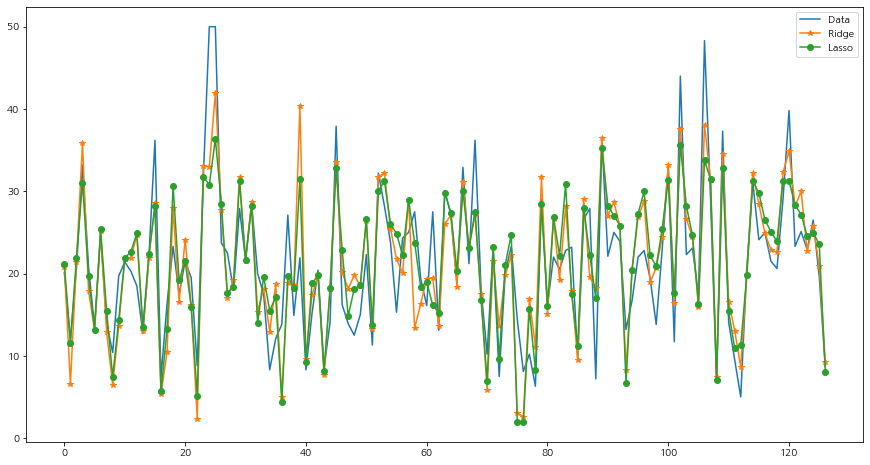

In [18]:
#결과 시각화
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label = 'Data')
ax.plot(range(len(y_test)), ridge_pred, '-*', label = 'Ridge')
ax.plot(range(len(y_test)), lasso_pred, '-o', label = 'Lasso')
plt.legend(loc = 'upper right')
plt.show()

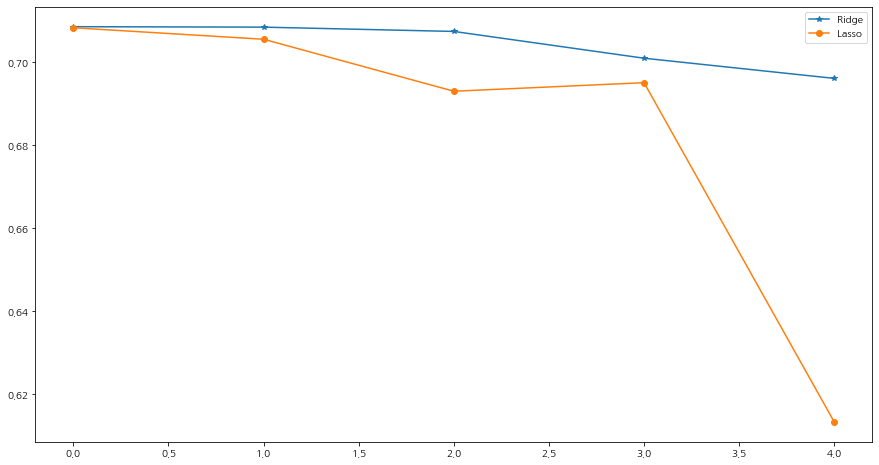

In [24]:
#R^2 구하기
ridge_result = []
lasso_result = []
alpha = [0.001, 0.01, 0.1, 1, 10]

for a in alpha:
    ridge = Ridge(alpha = a)
    lasso = Lasso(alpha = a)
    
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    
    ridge_pred = ridge.predict(X_test)
    lasso_pred = lasso.predict(X_test)
    
    ridge_r2, lasso_r2 = r2_score(y_test, ridge_pred), r2_score(y_test, lasso_pred)
    ridge_result.append(ridge_r2)
    lasso_result.append(lasso_r2)
    
#시각화
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.plot(range(5), ridge_result, '-*', label = 'Ridge')
ax.plot(range(5), lasso_result, '-o', label = 'Lasso')
plt.legend(loc = 'upper right')
plt.show()